In [1]:
import pandas as pd 
import wandb
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

plt.style.use(["science", "ieee"])
api = wandb.Api()


# Project is specified by <entity/project-name>
runs = api.runs("kobybibas/pnml_for_dnn")

In [8]:
summary_list, config_list, name_list = [], [], []
for run in runs:

    if not run.name.startswith('prune_2022'):
        continue 
    
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame(
    {"summary": summary_list, "config": config_list, "name": name_list}
)
runs_df


,summary,config,name
0,"{'loss/val': 0.19875912368297577, 'acc/train':...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220318_085535
1,"{'_timestamp': 1647593727, 'loss/train': 0.050...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220318_084934
2,"{'_step': 150, '_wandb': {'runtime': 401}, 'lr...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220318_084245
3,"{'trainer/global_step': 2769, '_wandb': {'runt...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220318_083617
4,"{'acc/val': 0.4880000054836273, '_runtime': 35...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_220653_0
5,"{'_runtime': 357, 'acc/test': 0.94150000810623...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_211658
6,"{'_wandb': {'runtime': 358}, 'acc/val': 0.9589...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_211051
7,"{'acc/train': 1, '_timestamp': 1647551443, '_s...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_210449
8,"{'_runtime': 352, 'acc/test': 0.94050002098083...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_205848
9,"{'trainer/global_step': 2485, '_wandb': {'runt...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_205243


In [9]:
runs_df['prune_amount'] = runs_df['config'].apply(lambda d: d['prune_amount'] if 'prune_amount' in d else 0 )
runs_df['acc_val'] = runs_df['summary'].apply(lambda d: d['acc/val'])
runs_df['acc_test'] = runs_df['summary'].apply(lambda d: d['acc/test'] if 'acc/test' in d else None )


In [10]:
runs_df = runs_df.sort_values(by='prune_amount')
runs_df.head()

,summary,config,name,prune_amount,acc_val,acc_test
22,"{'acc/test': 0.953499972820282, 'loss/val': 0....","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_193208,0.10,0.970,0.9535
21,"{'loss/test': 0.14781686663627625, '_timestamp...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_194007,0.15,0.971,0.9610
20,"{'acc/val': 0.9639999866485596, '_runtime': 35...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_194607,0.20,0.964,0.9610
18,"{'lr-SGD': 0.0010000000000000002, 'loss/val': ...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_195810,0.30,0.964,0.9570
19,"{'lr-SGD': 0.0010000000000000002, '_runtime': ...","{'train': {'lr': 0.1, 'epochs': 50, 'batch_siz...",prune_20220317_195207,0.35,0.964,0.9580


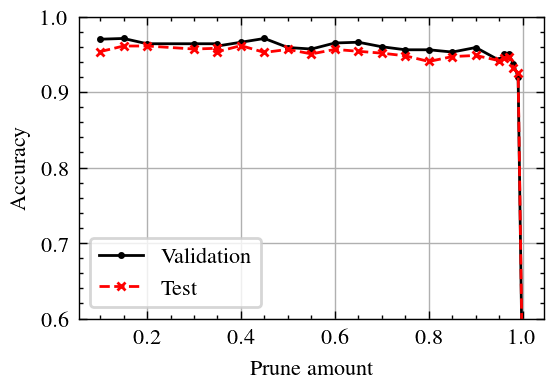

In [16]:
fig,ax = plt.subplots(1,1,figsize=(3,2),dpi=200)
runs_df.plot(x='prune_amount',y='acc_val' , xlabel='Prune amount', ylabel='Accuracy',marker='.',markersize=3,label='Validation',ax= ax)
runs_df.plot(x='prune_amount',y='acc_test' , xlabel='Prune amount', ylabel='Accuracy',marker='x',markersize=3,label='Test',ax= ax)
ax.set_ylim(0.6,1.0)
ax.grid()
plt.legend(frameon=True)
plt.show()